In [66]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [68]:
df_ = pd.read_csv('AirlineTweets.csv')

In [70]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [72]:
df = df_[['airline_sentiment', 'text']].copy()

<Axes: >

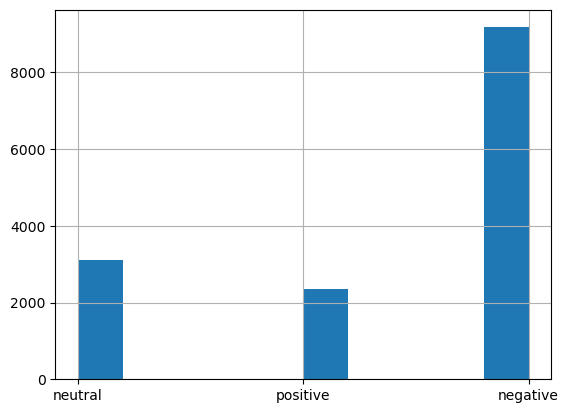

In [74]:
df['airline_sentiment'].hist()

In [76]:
target_map = {'positive': 1, 'negative': 0, 'neutral': 2}
df['target'] = df['airline_sentiment'].map(target_map)

In [78]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [82]:
df_train, df_test = train_test_split(df)

In [84]:
df_train.head()

,airline_sentiment,text,target
4148,negative,@united here I was thinking how I could say so...,0
14166,negative,@AmericanAir fight got Cancelled Flighted can ...,0
5909,positive,@SouthwestAir Thank you. Great tool,1
2470,negative,.@united too much info to share via tweet. Ple...,0
4652,negative,@SouthwestAir but when do I get my gin &amp; t...,0


In [86]:
vectorizer = TfidfVectorizer(max_features=2000)

In [88]:
X_train = vectorizer.fit_transform(df_train['text'])

In [90]:
X_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157738 stored elements in Compressed Sparse Row format>

In [92]:
print(X_train)

  (0, 1251)	0.2556212412398963
  (0, 970)	0.12748097994538135
  (0, 724)	0.10764511777855641
  (0, 1196)	0.11522567315510278
  (0, 503)	0.18819110217124344
  (0, 1993)	0.10279207476963262
  (0, 1745)	0.21230479771372235
  (0, 300)	0.15257577414959314
  (0, 1858)	0.33292695665174593
  (0, 802)	0.22127918384100992
  (0, 104)	0.19361285010952292
  (0, 1750)	0.28318760180410263
  (0, 1214)	0.25162435752703854
  (0, 1110)	0.2556212412398963
  (0, 1624)	0.1663591837464026
  (0, 1537)	0.25668069536378524
  (0, 448)	0.2232207569261428
  (0, 906)	0.17975784527874758
  (0, 1752)	0.34754178492162796
  (0, 1900)	0.14486037949011568
  (0, 875)	0.21308393009541515
  (0, 1847)	0.1009396001067818
  (1, 885)	0.17463491226219022
  (1, 1256)	0.10302068503949156
  (1, 1414)	0.23301687357886966
  :	:
  (10976, 869)	0.15472957274723143
  (10976, 724)	0.09979632511265357
  (10977, 1120)	0.5763746309378287
  (10977, 198)	0.28982610812602855
  (10977, 1431)	0.3998371930533222
  (10977, 1913)	0.3051094349942561

In [94]:
X_test = vectorizer.transform(df_test['text'])

In [96]:
Y_train = df_train['target']
Y_test = df_test['target']

In [98]:
Y_train

4148     0
14166    0
5909     1
2470     0
4652     0
        ..
14547    1
4443     2
6048     1
7676     2
1348     2
Name: target, Length: 10980, dtype: int64

In [100]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8561020036429873
Test acc: 0.7997267759562842


In [102]:
Pr_train = model.predict_proba(X_train)#[:, 1]
Pr_test = model.predict_proba(X_test)#[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train, multi_class='ovo'))#ovo = one versus one, used to build a multiclass model from a binary model
print("Test AUC:", roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9427226297738796
Test AUC: 0.8958925765525195


In [104]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [106]:
cm = confusion_matrix(Y_train, P_train, normalize='true') #normalize='true' each row of matrix sums to one
cm

array([[0.96344648, 0.00899333, 0.0275602 ],
       [0.19360366, 0.71216448, 0.09423187],
       [0.30492505, 0.04796574, 0.64710921]])

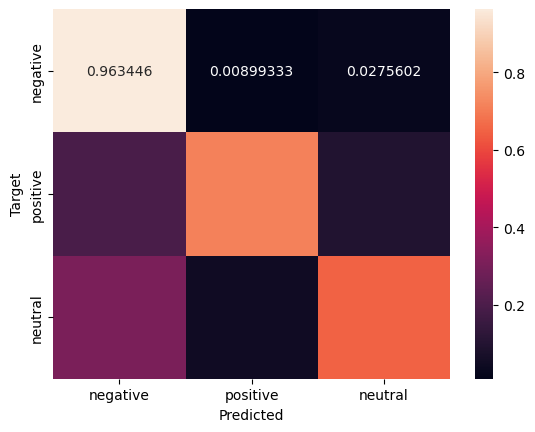

In [108]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['negative', 'positive', 'neutral']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

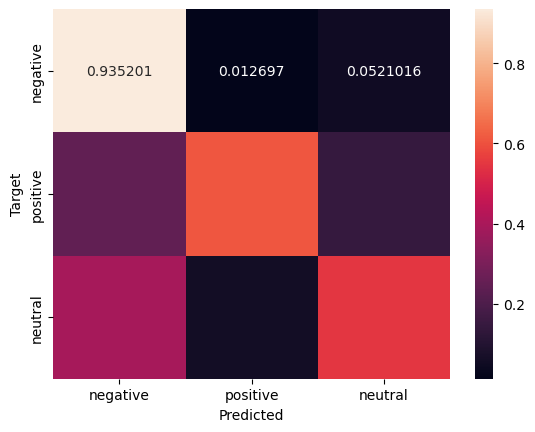

In [110]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

In [112]:
binary_target_list = [target_map['positive'], target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [114]:
df_b_train.head()

,airline_sentiment,text,target
4148,negative,@united here I was thinking how I could say so...,0
14166,negative,@AmericanAir fight got Cancelled Flighted can ...,0
5909,positive,@SouthwestAir Thank you. Great tool,1
2470,negative,.@united too much info to share via tweet. Ple...,0
4652,negative,@SouthwestAir but when do I get my gin &amp; t...,0


In [116]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [118]:
Y_train = df_b_train['target']
Y_test = df_b_test['target']

In [120]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.929091960670908
Test acc: 0.9105662983425414


In [122]:
Pr_train = model.predict_proba(X_train)[:, 1]
Pr_test = model.predict_proba(X_test)[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train))
print("Test AUC:", roc_auc_score(Y_test, Pr_test))

Train AUC: 0.9789041348497116
Test AUC: 0.9538126838592996


In [124]:
model.coef_ #weights of the model

array([[-0.31804992,  0.33413639, -0.77929618, ..., -0.08243201,
        -0.42615137,  0.21451666]])

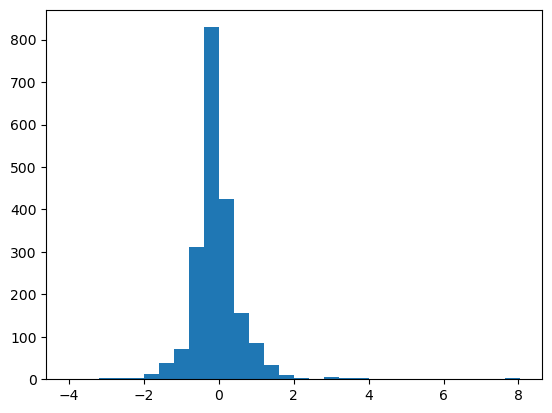

In [126]:
plt.hist(model.coef_[0], bins=30);

In [128]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'united': 1846,
 'here': 874,
 'was': 1902,
 'thinking': 1745,
 'how': 903,
 'could': 448,
 'say': 1528,
 'so': 1614,
 'many': 1108,
 'nice': 1210,
 'things': 1743,
 'after': 111,
 'getting': 803,
 'upgraded': 1858,
 'but': 297,
 'then': 1738,
 'you': 1993,
 'delayed': 505,
 'my': 1190,
 'flight': 726,
 'it': 968,
 'ok': 1246,
 'americanair': 147,
 'fight': 699,
 'got': 819,
 'cancelled': 311,
 'flighted': 730,
 'can': 310,
 'help': 869,
 'me': 1116,
 'rebook': 1433,
 'call': 304,
 'center': 335,
 'is': 962,
 'too': 1778,
 'busy': 296,
 'to': 1770,
 'answer': 158,
 'calls': 308,
 'or': 1263,
 'even': 629,
 'put': 1408,
 'on': 1250,
 'hold': 884,
 'southwestair': 1635,
 'thank': 1730,
 'great': 823,
 'much': 1186,
 'info': 944,
 'share': 1568,
 'via': 1881,
 'tweet': 1820,
 'please': 1350,
 'send': 1551,
 'your': 1995,
 'name': 1193,
 'and': 152,
 'contact': 435,
 'happy': 848,
 'with': 1950,
 'cs': 469,
 'rep': 1457,
 'names': 1194,
 'when': 1933,
 'do': 561,
 'get': 801,
 'amp': 150,

In [130]:
#let's look at the weights for each word
# try it with different threshold values!
threshold = 2

print("Most positive words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
southwestair 3.3399743434320124
thank 7.7092085731975635
great 5.521259239973937
jetblue 3.118376204434974
thanks 8.034991866645264
cool 2.197739902304403
thx 2.18072723785386
best 3.617420665200286
virginamerica 3.6426561808900173
amazing 3.7387340297658116
worries 2.963645055839749
love 4.53928590746977
good 3.122525849072174
appreciate 2.9495104166640176
awesome 4.175218606126934
wonderful 2.5128192938926897
kudos 2.860370249783668


In [132]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
delayed -2.7456190877773436
cancelled -2.4804172848307275
hold -2.9348963297040873
luggage -2.3158912458926686
why -2.378104197313267
no -3.58598503768629
not -4.007243754471117
worst -2.987705857739867
hours -3.13338866659188
what -2.4712791351856764
nothing -2.140343465732431


In [134]:
# Exercise: print the most-wrong tweets for both classes
# i.e. find a negative review where p(y = 1 | x) is closest to 1
#      find a positive review where p(y = 1 | x) is closest to 0

# Exercise: set class_weight='balanced'